In [225]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [226]:
claims=pd.read_csv('claims.csv')

In [227]:
claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [187]:
cust=pd.read_csv('cust_demographics.csv')

In [228]:
cust

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [229]:
claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   int64  
 1   customer_id          1100 non-null   int64  
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
dtypes: float64(1), int64(2), object(7)
memory usage: 86.1+ KB


In [230]:
print(claims.shape)
print(cust.shape)

(1100, 10)
(1085, 6)


In [231]:
cust_claims=pd.merge(left=claims,right=cust,left_on='customer_id',right_on='CUST_ID',how='outer')

In [232]:
cust_claims.tail(10)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
1097,79807493.0,85322831.0,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1098,69299345.0,73449366.0,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No,NaN,NaN,NaN,NaN,NaN,NaN
1099,58809728.0,43020876.0,Other driver error,06/04/2017,Auto,Yes,Material and injury,$36685,3.0,Yes,NaN,NaN,NaN,NaN,NaN,NaN
1100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38183238.0,Female,15-Mar-85,FL,596-319-8236,Gold
1101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48335931.0,Female,29-Jan-62,MO,654-352-4582,Silver
1102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74888099.0,Male,22-Jul-80,CO,125-613-7698,Platinum
1103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36009093.0,Female,04-Jun-84,SC,264-374-5794,Platinum
1104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60016590.0,Female,25-May-84,NV,649-742-8132,Silver
1105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96861647.0,Female,06-Aug-96,NH,495-732-2638,Silver
1106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70659761.0,Male,25-Jun-94,WI,928-163-5178,Platinum


In [233]:
cust_claims.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1107 entries, 0 to 1106
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   claim_id             1100 non-null   float64
 1   customer_id          1100 non-null   float64
 2   incident_cause       1100 non-null   object 
 3   claim_date           1100 non-null   object 
 4   claim_area           1100 non-null   object 
 5   police_report        1100 non-null   object 
 6   claim_type           1100 non-null   object 
 7   claim_amount         1035 non-null   object 
 8   total_policy_claims  1090 non-null   float64
 9   fraudulent           1100 non-null   object 
 10  CUST_ID              1092 non-null   float64
 11  gender               1092 non-null   object 
 12  DateOfBirth          1092 non-null   object 
 13  State                1092 non-null   object 
 14  Contact              1092 non-null   object 
 15  Segment              1092 non-null   o

In [234]:
cust_claims.head(2)

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,54004764.0,21868593.0,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No,21868593.0,Female,12-Jan-79,VT,789-916-8172,Platinum
1,33985796.0,75740424.0,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No,75740424.0,Female,13-Jan-70,ME,265-543-1264,Silver


In [241]:
# 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their
# business significance.
# 3. Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.


# claim_date -> date
cust_claims.claim_date=pd.to_datetime(cust_claims.claim_date,format='%m/%d/%Y')

# cust_id-->int
cust_claims['CUST_ID']= cust_claims['CUST_ID'].astype('Int64')

# cutomer_id-->int
cust_claims['customer_id']=cust_claims['customer_id'].astype('Int64')


# claim_id-->int

cust_claims['claim_id']=cust_claims['claim_id'].astype('Int64')

# DateOfBirth--> date
cust_claims['DateOfBirth']= pd.to_datetime(cust_claims.DateOfBirth,format='%d-%b-%y')

# claim_date --> date
cust_claims['claim_date']= pd.to_datetime(cust_claims.claim_date,format='%d-%b-%y')


cust_claims.loc[(cust_claims.DateOfBirth.dt.year > 2020),"DateOfBirth"]=cust_claims[cust_claims.DateOfBirth.dt.year > 2020]["DateOfBirth"].apply(lambda x: x - pd.DateOffset(years=100))

##claim_amount -> float and remove $ 

# cust_claims['claim_amount']=cust_claims['claim_amount'].str.replace('$','')
# # claim_amount -> strip whitespace
# cust_claims['claim_amount'] = cust_claims['claim_amount'].str.strip()
# # claim_amount ->convert to float
# cust_claims['claim_amount'] =cust_claims['claim_amount'].astype('float')

# one line solution
cust_claims["claim_amount"] = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""),downcast='float')


/var/folders/sc/ybl0t2wd6mz_fmh1xp737j4c0000gn/T/ipykernel_17141/3349120002.py:38: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  cust_claims["claim_amount"] = pd.to_numeric(cust_claims.claim_amount.str.replace("$",""),downcast='float')


In [242]:
# 4. Of all the injury claims, some of them have gone unreported with the
# police. Create an alert flag (1,0) for all such claims.

cust_claims['flag']=cust_claims.police_report.apply(lambda x: (1 if x =='Yes' else 0))

In [243]:
# 5. One customer can claim for insurance more than once and in each claim,
# multiple categories of claims can be involved. However, customer ID
# should remain unique.
# Retain the most recent observation and delete any duplicated records in
# the data based on the customer ID column.

cust_claims=cust_claims.groupby('CUST_ID').last().reset_index(drop = True)

In [244]:
# 6 Check for missing values and impute the missing values with an appropriate value.
# (mean for continuous and mode for categorical)

cat_var=['incident_cause','claim_area','police_report','claim_type','fraudulent','flag']
cont_var=['claim_amount','total_policy_claims']

cust_claims[cat_var]=cust_claims[cat_var].fillna(cust_claims.mode().iloc[0])

cust_claims[cont_var]=cust_claims[cont_var].fillna(cust_claims[cont_var].mean())

In [245]:
# 7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
# Children < 18
# Youth 18-30
# Adult 30-60
# Senior > 60


cust_claims['age']=dt.datetime.now().year-cust_claims.DateOfBirth.dt.strftime('%Y').astype('int')

cust_claims['age_cat']=cust_claims.age.apply(lambda x: 'Senior' if x>60  else 'Adult' if  (x>=30 ) else 'Youth' if (x>=18) else 'Children' )

cust_claims

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Contact,Segment,flag,age,age_cat
0,69348631,154557,Driver error,2018-04-10,Auto,No,Injury only,12501.492188,1.0,Yes,Female,1978-05-23,DE,962-879-1238,Platinum,0,44,Adult
1,40953049,263204,Other causes,2018-04-04,Auto,No,Material and injury,39192.000000,1.0,Yes,Male,1972-12-20,TX,173-892-6314,Silver,0,50,Adult
2,45780237,287476,Natural causes,2017-10-17,Auto,Unknown,Material only,1621.500000,2.0,Yes,Male,1988-07-28,FL,364-598-1549,Silver,0,34,Adult
3,89833962,441097,Other causes,2018-03-21,Auto,Yes,Material and injury,37040.000000,1.0,No,Male,1971-08-19,CA,187-348-8375,Gold,1,51,Adult
4,35782742,524545,Other driver error,2018-07-27,Auto,No,Injury only,35250.000000,3.0,No,Female,1980-08-10,NC,798-862-5398,Gold,0,42,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,4549014,99674324,Other causes,2018-07-07,Auto,No,Injury only,21480.000000,1.0,No,Male,1965-01-28,UT,517-562-4916,Silver,0,57,Adult
1081,35453672,99723844,Natural causes,2018-01-06,Auto,Yes,Material and injury,14360.000000,1.0,No,Female,1966-06-19,HI,457-752-1374,Gold,1,56,Adult
1082,37305754,99761663,Natural causes,2018-04-04,Auto,No,Material only,1242.000000,1.0,Yes,Female,1963-11-18,NC,643-246-4718,Silver,0,59,Adult
1083,22960702,99892000,Driver error,2017-11-13,Auto,No,Material only,2415.000000,2.0,Yes,Male,1995-06-08,OR,395-246-6172,Gold,0,27,Youth


In [246]:
# 8. What is the average amount claimed by the customers from various segments?

round(cust_claims.groupby('Segment')[['claim_amount']].mean())

,claim_amount
Segment,
Gold,12845.0
Platinum,12373.0
Silver,12269.0


In [247]:
# 9. What is the total claim amount based on incident cause for all the claims
# that have been done at least 20 days prior to 1st of October, 2018.

cust_claims.loc[cust_claims.claim_date < (pd.to_datetime('2018-01-10')-dt.timedelta(days=20)),:].groupby('incident_cause')[['claim_amount']].sum().add_prefix("total_").round()

,total_claim_amount
incident_cause,
Crime,400698.0
Driver error,1915569.0
Natural causes,713438.0
Other causes,2249834.0
Other driver error,1769384.0


In [248]:
# 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes?

cust_claims[(cust_claims.age_cat=='Adult') & 
            (cust_claims.State.isin (['TX','DE','AK'])) &
             (cust_claims.incident_cause.str.contains('driver' , case=False)  )].shape[0]

27

In [118]:
# 11. Draw a pie chart between the aggregated value of claim amount based
# on gender and segment. Represent the claim amount as a percentage on the pie chart.

In [249]:
claim_by_gender_segment=cust_claims.groupby(['gender','Segment'])[['claim_amount']].sum()/(cust_claims['claim_amount'].sum().round())*100
claim_by_gender_segment_pie=claim_by_gender_segment.reset_index()
gender_segment_pie= claim_by_gender_segment_pie.pivot(index = "Segment", columns = "gender", values = "claim_amount")
gender_segment_pie

gender,Female,Male
Segment,,
Gold,15.648228,19.580832
Platinum,17.562677,15.640137
Silver,14.264153,17.303972


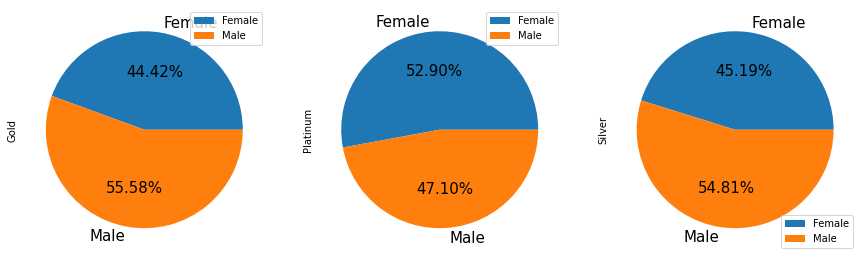

In [250]:
gender_segment_pie.T.plot(kind = "pie",subplots=True,figsize=(15,10),legend=True,fontsize=15,autopct='%1.2f%%')
plt.legend( loc='lower right' )
plt.show()

In [251]:
# 12. Among males and females, which gender had claimed the most for any type of driver related issues?
# E.g. This metric can be compared using a bar chart


males_vs_females =cust_claims[(cust_claims.incident_cause.str.contains ('driver',case = False))].groupby('gender')[['claim_amount']].sum().reset_index()
males_vs_females

,gender,claim_amount
0,Female,3136715.00
1,Male,3975407.75


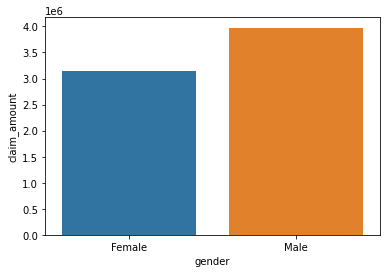

In [252]:
sns.barplot(x='gender',y='claim_amount',data=males_vs_females)
plt.show()

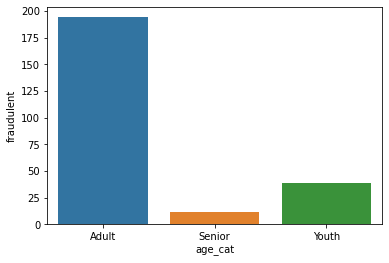

In [253]:
# 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
age_grp_fraud=cust_claims[cust_claims.fraudulent=='Yes'].groupby('age_cat').count()[['fraudulent']].reset_index()
sns.barplot(x='age_cat',y='fraudulent',data=age_grp_fraud)
plt.show()

In [259]:
# 14. Visualize the monthly trend of the total amount that has been claimed by the customers. 
# Ensure that on the “month” axis, the month is in a chronological order not alphabetical order.

# add month column in the dataframe
cust_claims['claim_month']=cust_claims['claim_date'].dropna().apply(lambda x: pd.Timestamp.strftime(x,format="%B"))

# get the total amount claimed by month
claim_by_month=cust_claims.groupby('claim_month')[['claim_amount']].sum().reset_index().round()
claim_by_month

# # set the mont to chronological order
sort_ref= ['January','February','March','April','May','June','July','August','September','October','November','December']
claim_by_month.index= pd.CategoricalIndex(claim_by_month['claim_month'],categories=sort_ref, ordered=True)
claim_by_month=claim_by_month.sort_index().reset_index(drop=True)
claim_by_month

,claim_month,claim_amount
0,January,1327169.0
1,February,1164542.0
2,March,1320249.0
3,April,1293954.0
4,May,1114460.0
5,June,1277349.0
6,July,1379314.0
7,August,911296.0
8,September,983198.0
9,October,1409637.0


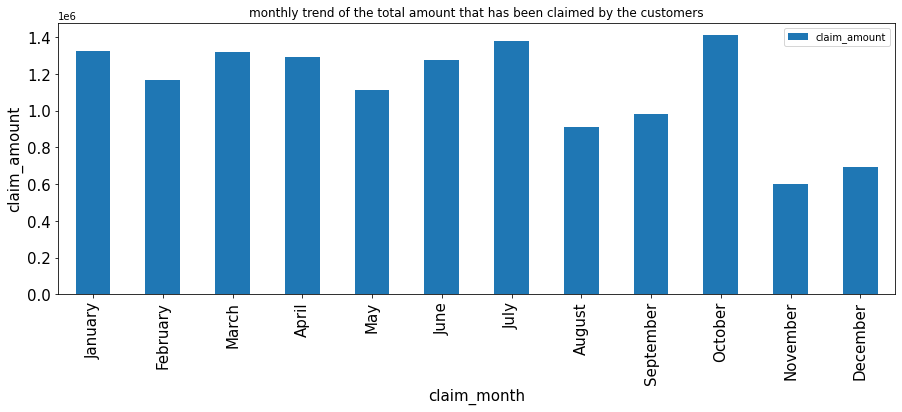

In [262]:
claim_by_month.plot(kind='bar',x='claim_month',y='claim_amount',figsize=(15,5),fontsize=15,title="monthly trend of the total amount that has been claimed by the customers")
plt.xlabel('claim_month',fontsize=15)
plt.ylabel('claim_amount',fontsize=15)

plt.show()

In [ ]:
# 15 What is the average claim amount for gender and age categories and suitably represent the above
# using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.


In [263]:
avg_claim_by_gender_age=cust_claims.groupby(['gender','age_cat','fraudulent'])[['claim_amount']].mean().reset_index().round()
avg_claim_by_gender_age

,gender,age_cat,fraudulent,claim_amount
0,Female,Adult,No,12127.0
1,Female,Adult,Yes,12200.0
2,Female,Senior,No,13783.0
3,Female,Senior,Yes,4388.0
4,Female,Youth,No,13166.0
5,Female,Youth,Yes,9220.0
6,Male,Adult,No,12307.0
7,Male,Adult,Yes,15747.0
8,Male,Senior,No,13766.0
9,Male,Senior,Yes,28232.0


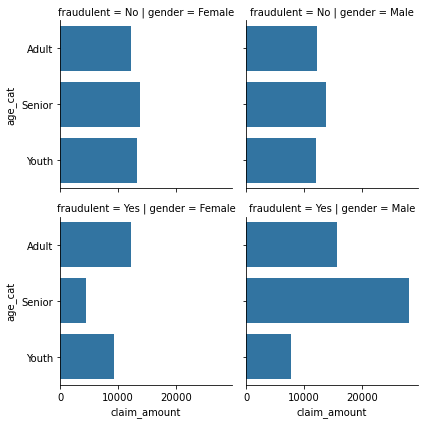

In [264]:
g = sns.FacetGrid(avg_claim_by_gender_age, row="fraudulent", col="gender")
g.map_dataframe(sns.barplot, "claim_amount","age_cat")

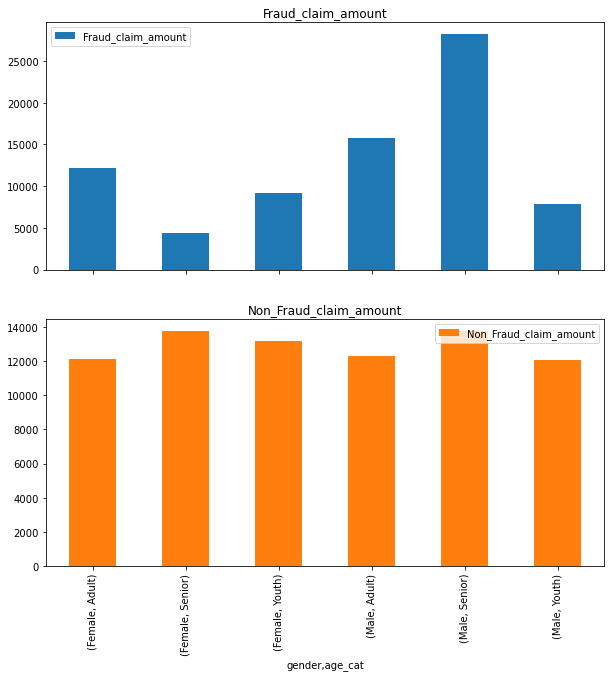

In [265]:
Frauds_amount_gender= pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="Yes")].groupby(["gender","age_cat"])[["claim_amount"]].mean().add_prefix("Fraud_"))

Non_Frauds_amount_gender=pd.DataFrame(cust_claims.loc[(cust_claims.fraudulent=="No")].groupby(["gender","age_cat"])[["claim_amount"]].mean().add_prefix("Non_Fraud_"))

Claims_age_gender=round(pd.merge(Frauds_amount_gender,Non_Frauds_amount_gender, on=["gender","age_cat"]),2)

Claims_age_gender

Claims_age_gender.plot(kind="bar", subplots= True, legend= True,figsize=(10,10))
plt.show()

# 16. Is there any similarity in the amount claimed by males and females?


### State the Null hypothesis and Alternate hypothesis
#### Ho=There is similarity in the amount claimed by males and females (u1=u2)
#### Ha=there is no similarity in the amount claimed by males and females (u1<>u2)

## set the confidance interval
#### CI=95%

## set the level of siginificance

#### P-Value=0.05

### set the data

In [266]:

claim_male=cust_claims[cust_claims.gender=='Male']['claim_amount']
claim_male

1       39192.0
2        1621.5
3       37040.0
5        2630.0
6        2920.0
         ...   
1074     2370.0
1079     2260.0
1080    21480.0
1083     2415.0
1084     2310.0
Name: claim_amount, Length: 553, dtype: float32

In [267]:
claim_female=cust_claims[cust_claims.gender=='Female']['claim_amount']
claim_female

0       12501.492188
4       35250.000000
7       21190.000000
9        2507.000000
10      25010.000000
            ...     
1076    20033.000000
1077     3139.500000
1078     1495.000000
1081    14360.000000
1082     1242.000000
Name: claim_amount, Length: 532, dtype: float32

## These are independent samples. Thus , we need to perform the two tail t-test for independed sample 

In [268]:
print("The average amount claimed by males is {}".format(claim_male.mean()))
print("The average amount claimed by females is {}".format(claim_female.mean()))

The average amount claimed by males is 12883.4443359375
The average amount claimed by females is 12104.4599609375


In [269]:
import scipy.stats as stats

### Compute the test statitics

In [270]:
var_stat=stats.ttest_ind(claim_male,claim_female)
var_stat

Ttest_indResult(statistic=0.962997808429227, pvalue=0.3357635884274691)

### compare the critical value with the test statatics value 

In [271]:
p=var_stat.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


### Business outcome : There is similarity in usege of male and female 

# 17. Is there any relationship between age category and segment?

### step 1 : 

#### Ho = there is NO relationship between the age and segment. (u1=u2)

#### Ha = There is relationship between age category and segment.(u1<>u2)

### Step 2: 
 ### set the confidance interval
#### CI =95%

#### set the level of significance 
#### p=0.05
     
## Step 3:     
### Set the data     

In [272]:
observed = pd.crosstab (index=cust_claims.Segment , columns=cust_claims.age_cat)
observed

age_cat,Adult,Senior,Youth
Segment,,,
Gold,286,15,71
Platinum,277,17,70
Silver,263,17,69


## Step 4: Perform the test
### Segment and age category are two categorical varible. thus , we will perform the chi-square test.

In [273]:
stats.chi2_contingency(observed)

(0.41232223162261983,
 0.981455670607777,
 4,
 array([[283.2       ,  16.8       ,  72.        ],
        [277.10967742,  16.43870968,  70.4516129 ],
        [265.69032258,  15.76129032,  67.5483871 ]]))

### P value is greater than the .05. Thus, we fail to reject the null hypothsis.

### There is NO relationship between segment and age category

# 18. The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000.

### Step 1
#### Ho : there is NO significant rise in the claim amount.
#### Ha : there is  siginciant rise in the claim amount.
### Step 2 : CI = 95% 
###          P- Value =0.05%


### step 3 : set the data 

In [283]:
# Create Year column
cust_claims['claim_year']=cust_claims['claim_date'].dt.year

cust_claims['claim_year']=cust_claims['claim_year'].astype('Int64')

In [293]:
# Get the current year (latest) from the data
cust_claims.claim_year.max()

2018

In [301]:
cust_claims[cust_claims.claim_year==2018][['claim_amount']]

,claim_amount
0,12501.492188
1,39192.000000
3,37040.000000
4,35250.000000
5,2630.000000
...,...
1078,1495.000000
1080,21480.000000
1081,14360.000000
1082,1242.000000


In [327]:
current_year_claim=cust_claims.loc[cust_claims.claim_year == 2018]["claim_amount"]
claim_year_2017=cust_claims.loc[cust_claims.claim_year == 2017]["claim_amount"]

In [329]:
current_year_claim

0       12501.492188
1       39192.000000
3       37040.000000
4       35250.000000
5        2630.000000
            ...     
1078     1495.000000
1080    21480.000000
1081    14360.000000
1082     1242.000000
1084     2310.000000
Name: claim_amount, Length: 484, dtype: float32

In [328]:
claim_year_2017

2        1621.5
7       21190.0
8        2490.0
10      25010.0
11      30540.0
         ...   
1072     1550.0
1073     2840.0
1074     2370.0
1079     2260.0
1083     2415.0
Name: claim_amount, Length: 594, dtype: float32

In [347]:
print("fiscal average of current " , round(current_year_claim.mean()))
print("fiscal average of year 2016-2017 ",round(claim_year_2017.mean()))

fiscal average of current  12766
fiscal average of year 2016-2017  12286


### These are independent data set. thus, we will perform the independent T-Test.

In [351]:
check_stats=stats.ttest_ind(current_year_claim,claim_year_2017)
check_stats

Ttest_indResult(statistic=0.5870960182564192, pvalue=0.557262385034965)

In [333]:
p=check_stats.pvalue
if(p<0.05):
    print('We reject null hypothesis')
else:
    print('We fail to reject null hypothesis')

We fail to reject null hypothesis


#### Thus , There is no significat increase in claim amount in current year as compared to 2016-17.

# 19. Is there any difference between age groups and insurance claims?

#### Ho = There is NO difference between age groups and insurance claims.
#### Ha = There is difference between age groups and insurance claims.

#### CI=95%

#### P-Value =0.05

In [356]:
cust_claims.age_cat.unique()

array(['Adult', 'Youth', 'Senior'], dtype=object)

In [357]:
cust_claims.age_cat.value_counts()

Adult     826
Youth     210
Senior     49
Name: age_cat, dtype: int64

In [370]:
a1=cust_claims.loc[cust_claims.age_cat=='Adult','claim_amount' ]
a2=cust_claims.loc[cust_claims.age_cat=='Youth','claim_amount' ]
a3=cust_claims.loc[cust_claims.age_cat=='Senior','claim_amount']

In [377]:
print('mean of claim amount by adult' ,a1.mean() ,'| mean of claim amount by Youth' ,a2.mean(),'| mean of claim amount by Senior' ,a3.mean() )

mean of claim amount by adult 12639.546875 | mean of claim amount by Youth 11857.3427734375 | mean of claim amount by Senior 12934.81640625


###  There are more than two variable. thus , we will perform the ANOVA/f-Test

In [379]:
stats.f_oneway(a1,a2,a3)

F_onewayResult(statistic=0.3154730625737186, pvalue=0.7295107919591701)

### Thus, we failed to reject the Ho.
### There is NO difference between age groups and insurance claims.


# 20. Is there any relationship between total number of policy claims and the claimed amount?

#### Ho : There is NO relationship between total number of policy claims and the claimed amount.
#### Ha : There is  relationship between total number of policy claims and the claimed amount.

#### CI=95%
#### P- Value = 0.5%


In [401]:
cust_claims.total_policy_claims

0       1.0
1       1.0
2       2.0
3       1.0
4       3.0
       ... 
1080    1.0
1081    1.0
1082    1.0
1083    2.0
1084    1.0
Name: total_policy_claims, Length: 1085, dtype: float64

In [402]:
cust_claims.claim_amount

0       12501.492188
1       39192.000000
2        1621.500000
3       37040.000000
4       35250.000000
            ...     
1080    21480.000000
1081    14360.000000
1082     1242.000000
1083     2415.000000
1084     2310.000000
Name: claim_amount, Length: 1085, dtype: float32

In [403]:
stats.pearsonr(cust_claims.total_policy_claims,cust_claims.claim_amount)

(-0.021900561799134775, 0.47112801721288633)

### Total number of policy claims and the claimed amount are negativaly related.

### P-Value is high. thus, we failed to reject the Null hypothesis.